In [2]:
# import libraries...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [3]:
# loading datasets...
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data = pd.read_csv('QVI_transaction_data.csv')

print(customer_data.head(),'\n')
print(transaction_data.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream 

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&

## Examining Transaction Data:

In [4]:
print(transaction_data.head(10),'\n')
print(transaction_data.info()) # No Null values in the Dataset.

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43604          4            4074    2982        57   
6  43601          4            4149    3333        16   
7  43601          4            4196    3539        24   
8  43332          5            5026    4525        42   
9  43330          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chil

In [5]:
# Changing Date type...
import xlrd

def change_date(x):
    x = xlrd.xldate_as_datetime(x,0)
    return x

transaction_data['DATE'] = transaction_data['DATE'].apply(change_date)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
print(transaction_data['PROD_QTY'].value_counts())
x = np.where(transaction_data['PROD_QTY']==200) 
print(x)# 2 quantities are considered to be outliers. As they are valued to 200...


2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64
(array([69762, 69763], dtype=int64),)


#### droping the outliers in PROD_QTY:

In [7]:
transaction_data.loc[69762,:] 

DATE                           2018-08-19 00:00:00
STORE_NBR                                      226
LYLTY_CARD_NBR                              226000
TXN_ID                                      226201
PROD_NBR                                         4
PROD_NAME         Dorito Corn Chp     Supreme 380g
PROD_QTY                                       200
TOT_SALES                                    650.0
Name: 69762, dtype: object

In [8]:
transaction_data.loc[transaction_data['LYLTY_CARD_NBR'] == 226000,:]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [9]:

transaction_data.drop(transaction_data.index[transaction_data['LYLTY_CARD_NBR'] == 226000],inplace = True) # deleting the outliers from the dataset.
transaction_data.drop(transaction_data.index[transaction_data['LYLTY_CARD_NBR'] == 226000],inplace = True) 
print(transaction_data['PROD_QTY'].value_counts())

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64


In [10]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [11]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [12]:
def cls(x):
    x = re.sub('[&/]', ' ', x) # remove special characters '&' and '/'
    x = re.sub('\d\w*', ' ', x) # remove product weights
    return x
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(cls)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [13]:
def bn(x): # Extracting Brand Name from PROD_NAME
    x = re.split('\s',x)
    return x[0]

transaction_data['BRAND_NAME'] = transaction_data['PROD_NAME'].apply(bn)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [14]:
print(transaction_data['BRAND_NAME'].unique())
len(transaction_data['BRAND_NAME'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']


29

In [15]:
transaction_data['BRAND_NAME'].replace(['NCC','Ncc'], 'Natural', inplace = True)
transaction_data['BRAND_NAME'].replace('Ccs', 'CCS', inplace = True)
transaction_data['BRAND_NAME'].replace('Smith', 'Smiths', inplace = True)
transaction_data['BRAND_NAME'].replace(['Grain', 'Grnwves','GrnWves'], 'Grainwaves', inplace = True)
transaction_data['BRAND_NAME'].replace('Dorito', 'Doritos', inplace = True)
transaction_data['BRAND_NAME'].replace(['WW','Ww'], 'Woolworths', inplace = True)
transaction_data['BRAND_NAME'].replace('Infzns', 'Infuzions', inplace = True)
transaction_data['BRAND_NAME'].replace(['Red', 'Rrd','RRD'], 'Red Rock Deli', inplace = True)
transaction_data['BRAND_NAME'].replace('Snbts', 'Sunbites', inplace = True)

transaction_data['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [16]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle


In [17]:
print('Most bought chips brand grouped by it\'s quantity and sales. Order by Sales \n')
x = transaction_data.groupby('BRAND_NAME').PROD_QTY.sum().sort_values(ascending = False)
y = transaction_data.groupby('BRAND_NAME').TOT_SALES.sum().sort_values(ascending = False)
df = pd.concat([y,x],axis = 1)
print(df)
print(' \n \n Most bought chips brand grouped by it\'s quantity and sales. Order by quantity. \n')
df1 = pd.concat([x,y],axis = 1)
print(df1)

Most bought chips brand grouped by it's quantity and sales. Order by Sales 

               TOT_SALES  PROD_QTY
BRAND_NAME                        
Kettle          390239.8     79051
Doritos         240590.9     53816
Smiths          224660.2     60339
Pringles        177655.5     48019
Infuzions        99047.6     27119
Red Rock Deli    95046.0     33646
Old              90785.1     17805
Thins            88852.5     26929
Twisties         81522.1     18118
Tostitos         79789.6     18134
Cobs             70569.8     18571
Tyrrells         51647.4     12298
Grainwaves       51617.2     14726
Woolworths       49343.6     27856
Natural          42318.0     14106
Cheezels         40029.9      8747
CCs              18078.9      8609
Cheetos          16884.5      5530
Sunbites          9676.4      5692
French            7929.0      2643
Burger            6831.0      2970
 
 
 Most bought chips brand grouped by it's quantity and sales. Order by quantity. 

               PROD_QTY  TOT_SAL

## Examining customer Data:

In [18]:
customer_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [19]:
customer_data['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)


Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [20]:
customer_data['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [21]:
customer_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


### Combining transaction data and customer data:

In [22]:
chips_data = pd.merge(transaction_data,customer_data)
chips_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted,2,8.4,165,Tyrrells,MIDAGE SINGLES/COUPLES,Budget
9,2018-08-09,4,4074,2979,60,Kettle Tortilla ChpsFeta Garlic,2,9.2,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [23]:
chips_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum().sort_values(ascending = False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              168363.25
YOUNG SINGLES/COUPLES   Mainstream          157621.60
RETIREES                Mainstream          155677.05
YOUNG FAMILIES          Budget              139345.85
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132263.15
RETIREES                Budget              113147.80
OLDER FAMILIES          Mainstream          103445.55
RETIREES                Premium              97646.05
YOUNG FAMILIES          Mainstream           92788.75
MIDAGE SINGLES/COUPLES  Mainstream           90803.85
YOUNG FAMILIES          Premium              84025.50
OLDER FAMILIES          Premium              80658.40
YOUNG SINGLES/COUPLES   Budget               61141.60
MIDAGE SINGLES/COUPLES  Premium              58432.65
YOUNG SINGLES/COUPLES   Premium              41642.10
MIDAGE SINGLES/COUPLES  Budget           

In [24]:
print(chips_data.groupby('LIFESTAGE').TOT_SALES.sum().sort_values(ascending = False))

LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            352467.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64


In [25]:
print(chips_data.groupby('PREMIUM_CUSTOMER').TOT_SALES.sum().sort_values(ascending = False))

PREMIUM_CUSTOMER
Mainstream    750744.50
Budget        676211.55
Premium       506158.95
Name: TOT_SALES, dtype: float64


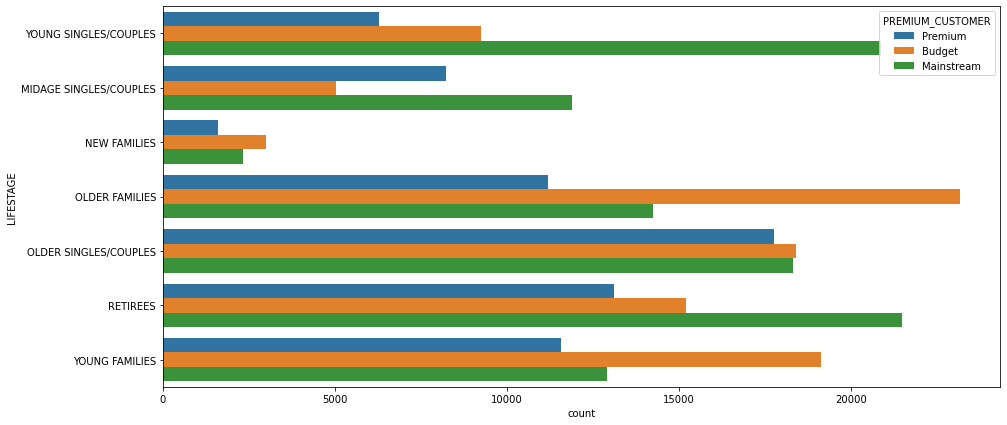

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(y = chips_data['LIFESTAGE'],hue = chips_data['PREMIUM_CUSTOMER'],ax = ax)
plt.show()

Most bought chips brand grouped by it's quantity and sales. Order by Sales 

            TOT_SALES  PROD_QTY
BRAND_NAME                     
Kettle       390239.8     79051
Doritos      240590.9     53816
Smiths       224660.2     60339
Pringles     177655.5     48019
Infuzions     99047.6     27119
 
 
 Most bought chips brand grouped by it's quantity and sales. Order by quantity. 

               PROD_QTY  TOT_SALES
BRAND_NAME                        
Kettle            79051   390239.8
Smiths            60339   224660.2
Doritos           53816   240590.9
Pringles          48019   177655.5
Red Rock Deli     33646    95046.0


C:\Users\surya\AppData\Local\Temp\ipykernel_17840\2126553967.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


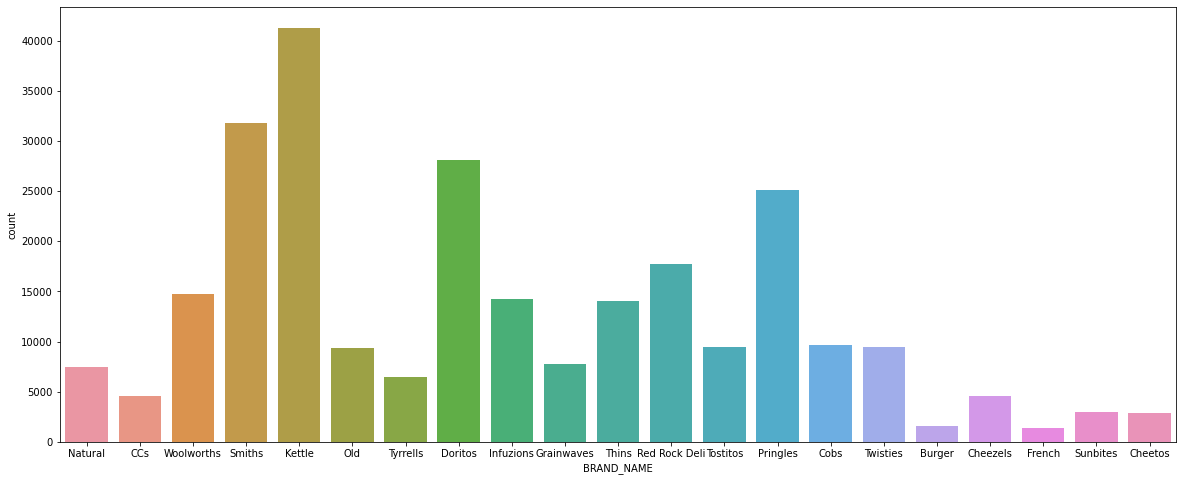

In [39]:
print('Most bought chips brand grouped by it\'s quantity and sales. Order by Sales \n')
x = transaction_data.groupby('BRAND_NAME').PROD_QTY.sum().sort_values(ascending = False)
y = transaction_data.groupby('BRAND_NAME').TOT_SALES.sum().sort_values(ascending = False)
df = pd.concat([y,x],axis = 1)
print(df.head())
print(' \n \n Most bought chips brand grouped by it\'s quantity and sales. Order by quantity. \n')
df1 = pd.concat([x,y],axis = 1)
print(df1.head())
fig,ax = plt.subplots(figsize = (20,8))
sns.countplot(x = chips_data['BRAND_NAME'],ax = ax)
fig.show()

In [ ]:
print('Least bought chips brand grouped by it\'s quantity and sales. Order by Sales \n')
x = transaction_data.groupby('BRAND_NAME').PROD_QTY.sum().sort_values(ascending = False)
y = transaction_data.groupby('BRAND_NAME').TOT_SALES.sum().sort_values(ascending = False)
df = pd.concat([y,x],axis = 1)
print(df.tail())
print(' \n \n Least bought chips brand grouped by it\'s quantity and sales. Order by quantity. \n')
df1 = pd.concat([x,y],axis = 1)
print(df1.tail())

# Conclusion:
- Most sold chips brand are (Kettle,Smiths,Doritos). Least sold chips brand are (French,Burger,Cheetos).
- Mainstream Customers are more in number,compared to other Customers and Retirees are more in number, compared to other lifestaged customers.
- sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
- Mainstream customers did more sales when compared to others
- Older singles/couples did more sales when compared to other lifestage.